In [ ]:
from IPython import get_ipython

In [4]:
import sys
# psycopg2 is needed to connect to Postgres or Redshift
!conda install --yes psycopg2

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - psycopg2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    libpq-12.3                 |       h5513abc_0         2.6 MB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    psycopg2-2.8.5             |   py37hb09aad4_1         166 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following NEW packages will be INSTAL

In [5]:
import os
redshiftUrl=os.environ['REDSHIFT_CONNECT_URL']
replicaUrl=os.environ['REPLICA_CONNECT_URL']
etlUrl=os.environ['ETL_CONNECT_URL']
bool(redshiftUrl and replicaUrl and etlUrl) and "All set!"

'All set!'

In [6]:
from sqlalchemy import create_engine
# Remember to configure firewall to allow Docker to access ports
engine = create_engine(replicaUrl)
engine.connect()

In [7]:
import pandas as pd

In [20]:
appealDf = pd.read_sql_query("select * from appeals where uuid='98e18b45-cacc-4765-aa01-72d54f6d7469'",con=engine)

In [21]:
appealDf

,id,veteran_file_number,receipt_date,docket_type,established_at,uuid,legacy_opt_in_approved,veteran_is_not_claimant,establishment_submitted_at,establishment_processed_at,...,target_decision_date,closest_regional_office,establishment_canceled_at,docket_range_date,poa_participant_id,created_at,updated_at,stream_docket_number,stream_type,aod_based_on_age
0,30161,316662418,2019-08-26,direct_review,2019-09-18 13:25:11.734061,98e18b45-cacc-4765-aa01-72d54f6d7469,False,False,2019-09-18 13:25:13.521351,2019-09-18 13:25:13.641030,...,2020-08-25,None,None,None,None,2019-09-18 13:25:11.734061,2020-07-29 15:18:11.430125,190826-30161,original,False


In [23]:
appeal_id=appealDf.loc[0,"id"]

In [24]:
f"select * from tasks where appeal_id={appeal_id} and appeal_type='Appeal'"

"select * from tasks where appeal_id=30161 and appeal_type='Appeal'"

In [27]:
tasksDf = pd.read_sql_query(f"select * from tasks where appeal_id={appeal_id} and appeal_type='Appeal'",con=engine)
tasksDf

,id,appeal_id,status,type,instructions,assigned_to_id,assigned_by_id,assigned_at,started_at,created_at,updated_at,appeal_type,placed_on_hold_at,assigned_to_type,parent_id,closed_at
0,963590,30161,in_progress,AttorneyQualityReviewTask,[QR review--return to atty for admin action pe...,1063,824.0,2020-06-24 14:34:31.465660,2020-06-24 15:57:48.040644,2020-06-18 19:08:33.004488,2020-06-24 15:57:48.040795,Appeal,2020-06-18 20:32:41.774427,User,963377.0,NaT
1,963917,30161,completed,OtherColocatedTask,"[The fiduciary file is missing, if this contai...",23,1063.0,2020-06-18 20:32:41.683567,NaT,2020-06-18 20:32:41.683567,2020-06-24 14:34:31.437936,Appeal,2020-06-18 20:32:41.749501,Organization,963590.0,2020-06-24 14:34:31.437796
2,969559,30161,completed,OtherColocatedTask,"[The fiduciary file is missing, if this contai...",803,1888.0,2020-06-18 20:32:41.683567,2020-06-22 19:50:48.858797,2020-06-22 15:57:05.591825,2020-06-24 14:34:31.412580,Appeal,NaT,User,963917.0,2020-06-24 14:34:31.412441
3,963918,30161,cancelled,OtherColocatedTask,"[The fiduciary file is missing, if this contai...",10627,1063.0,2020-06-18 20:32:41.683567,NaT,2020-06-18 20:32:41.743112,2020-06-22 15:57:05.605936,Appeal,NaT,User,963917.0,2020-06-22 15:57:05.605778
4,963377,30161,on_hold,JudgeQualityReviewTask,[QR review],824,1071.0,2020-06-18 18:24:26.192867,2020-06-18 19:08:09.163009,2020-06-18 18:24:26.192867,2020-06-18 19:08:33.022475,Appeal,2020-06-18 19:08:33.022370,User,941750.0,NaT
5,941750,30161,on_hold,QualityReviewTask,[QR review],1071,1071.0,2020-06-09 10:55:28.500488,2020-06-10 13:15:26.733851,2020-06-09 10:55:28.500488,2020-06-18 18:24:26.209587,Appeal,2020-06-18 18:24:26.209472,User,934712.0,NaT
6,934712,30161,on_hold,QualityReviewTask,[],17,NaN,2020-06-04 16:24:33.199688,NaT,2020-06-04 16:24:33.199688,2020-06-09 10:55:28.515286,Appeal,2020-06-09 10:55:28.515202,Organization,416398.0,NaT
7,826278,30161,completed,JudgeDecisionReviewTask,[],824,546.0,2020-06-03 22:50:23.406136,2020-06-04 16:09:35.771066,2020-04-14 17:18:11.863861,2020-06-04 16:24:32.803765,Appeal,2020-04-28 20:31:47.230969,User,416398.0,2020-06-04 16:24:32.803592
8,861921,30161,completed,AttorneyRewriteTask,[Please check 10182- does not look like signe...,1063,824.0,2020-05-26 17:01:31.822484,2020-05-26 20:38:56.005740,2020-04-28 20:31:47.202939,2020-06-03 22:50:23.384759,Appeal,2020-05-26 15:43:53.389492,User,826278.0,2020-06-03 22:50:23.384594
9,914540,30161,completed,NewRepArgumentsColocatedTask,[DAV is the rep in this case. The vet is inco...,23,1063.0,2020-05-26 15:43:53.322659,NaT,2020-05-26 15:43:53.322659,2020-05-26 17:01:31.796092,Appeal,2020-05-26 15:43:53.371420,Organization,861921.0,2020-05-26 17:01:31.795879


In [31]:
sortedTasksDf=tasksDf.set_index('id').sort_values(by=['id','created_at'])
sortedTasksDf

,appeal_id,status,type,instructions,assigned_to_id,assigned_by_id,assigned_at,started_at,created_at,updated_at,appeal_type,placed_on_hold_at,assigned_to_type,parent_id,closed_at
id,,,,,,,,,,,,,,,
416398,30161,on_hold,RootTask,[],2,NaN,2019-09-18 13:25:11.740577,NaT,2019-09-18 13:25:11.740577,2019-09-18 13:25:12.213775,Appeal,2019-09-18 13:25:12.213707,Organization,NaN,NaT
416399,30161,in_progress,TrackVeteranTask,[],8,NaN,2019-09-18 13:25:12.210025,NaT,2019-09-18 13:25:12.210025,2019-09-18 13:25:12.210025,Appeal,NaT,Organization,416398.0,NaT
416400,30161,completed,DistributionTask,[],2,NaN,2020-04-01 11:46:28.954678,NaT,2019-09-18 13:25:12.216959,2020-04-01 11:50:26.269381,Appeal,2019-09-18 13:25:12.229691,Organization,416398.0,2020-04-01 11:50:26.269241
416401,30161,completed,InformalHearingPresentationTask,[],8,NaN,2019-09-18 13:25:12.225048,NaT,2019-09-18 13:25:12.225048,2020-04-01 11:46:28.938323,Appeal,2020-01-20 16:32:10.389322,Organization,416400.0,2020-04-01 11:46:28.938187
416402,30161,assigned,VeteranRecordRequest,[],217,NaN,2019-09-18 13:25:12.233668,NaT,2019-09-18 13:25:12.234462,2019-09-18 13:25:12.234462,Appeal,NaT,Organization,416398.0,NaT
629098,30161,cancelled,InformalHearingPresentationTask,"[Brief, Brief]",2172,2124.0,2020-01-20 16:32:10.376452,NaT,2020-01-20 16:32:10.376452,2020-03-30 18:16:26.017189,Appeal,NaT,User,416401.0,2020-03-30 18:16:26.017004
790949,30161,completed,InformalHearingPresentationTask,"[Brief, Brief]",2255,2124.0,2020-01-20 16:32:10.376452,NaT,2020-03-30 18:16:25.938178,2020-04-01 11:46:28.918153,Appeal,NaT,User,416401.0,2020-04-01 11:46:28.918011
796324,30161,cancelled,JudgeAssignTask,[This appears to be a specialty case - removal...,1342,NaN,2020-04-01 11:50:26.258360,NaT,2020-04-01 11:50:26.258360,2020-04-10 18:24:37.092734,Appeal,NaT,User,416398.0,2020-04-10 18:24:37.092610
819661,30161,completed,JudgeAssignTask,[This appears to be a specialty case - removal...,546,1342.0,2020-04-01 11:50:26.258360,NaT,2020-04-10 18:24:37.079392,2020-04-14 17:18:11.898383,Appeal,NaT,User,416398.0,2020-04-14 17:18:11.898217


In [32]:
!conda install --yes plotly

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-4.9.0               |     pyh9f0ad1d_0         5.7 MB  conda-forge
    retrying-1.3.3             |             py_2          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.8 MB

The following NEW packages will be INSTALLED:

  plotly             conda-forge/noarch::plotly-4.9.0-pyh9f0ad1d_0
  retrying           conda-forge/noarch::retrying-1.3.3-py_2



plotly-4.9.0         | 5.7 MB    | ##################################### | 100% 
retrying-1.3.3    

In [45]:
import plotly.express as px
import pandas as pd
from datetime import timedelta

In [46]:
filteredDf=sortedTasksDf[sortedTasksDf['updated_at']-sortedTasksDf['created_at'] > timedelta(minutes=1)]

In [47]:
sortedTasksDf['updated_at']-sortedTasksDf['created_at'] > timedelta(minutes=1)

id
416398    False
416399    False
416400     True
416401     True
416402    False
629098     True
790949     True
796324     True
819661     True
826278     True
826279     True
861921     True
914540     True
914541     True
934712     True
941750     True
963377     True
963590     True
963917     True
963918     True
969559     True
dtype: bool

In [50]:
fig = px.timeline(filteredDf, x_start="created_at", x_end="updated_at", y="type", color="assigned_to_type")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

In [52]:
!conda install --yes panel

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - panel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    markdown-3.2.2             |             py_0          61 KB  conda-forge
    panel-0.9.5                |             py_1         925 KB  conda-forge
    param-1.9.3                |             py_0          60 KB  conda-forge
    pyct-0.4.6                 |             py_0           3 KB  conda-forge
    pyct-core-0.4.6            |             py_0          1

In [ ]:
import panel as pn
pn.extension('plotly')

In [65]:
def tasks_gantt(filtered=True, yaxis="type", legend="assigned_to_type"):
    df = filteredDf if filtered else sortedTasksDf
    fig = px.timeline(df, x_start="created_at", x_end="updated_at", y=yaxis, color=legend)
    fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
    return fig

kw = dict(yaxis=sorted(list(filteredDf.columns)), legend=sorted(list(filteredDf.columns)))
gantt = pn.interact(tasks_gantt, **kw)
gantt

Column
    [0] Column
        [0] Checkbox(name='filtered', value=True)
        [1] Select(name='yaxis', options=['appeal_id', ...], value='type')
        [2] Select(name='legend', options=['appeal_id', ...], value='assigned_to_type')
    [1] Row
        [0] Plotly(Figure, name='interactive00104')

In [68]:
gantt.servable();

In [12]:
df = pd.read_sql_query("select * from appeals limit 4",con=engine)

In [13]:
df

,id,veteran_file_number,receipt_date,docket_type,established_at,uuid,legacy_opt_in_approved,veteran_is_not_claimant,establishment_submitted_at,establishment_processed_at,...,target_decision_date,closest_regional_office,establishment_canceled_at,docket_range_date,poa_participant_id,created_at,updated_at,stream_docket_number,stream_type,aod_based_on_age
0,30161,316662418,2019-08-26,direct_review,2019-09-18 13:25:11.734061,98e18b45-cacc-4765-aa01-72d54f6d7469,False,False,2019-09-18 13:25:13.521351,2019-09-18 13:25:13.641030,...,2020-08-25,None,None,None,None,2019-09-18 13:25:11.734061,2020-07-29 15:18:11.430125,190826-30161,original,False
1,47798,414371458,2019-11-06,hearing,2019-12-12 16:05:52.002593,70ff6697-62ba-44f3-b5af-92e787660837,False,False,2019-12-12 16:05:53.841286,2019-12-12 16:05:53.938945,...,None,RO18,None,None,None,2019-12-12 16:02:28.554780,2020-07-29 16:26:19.218981,191106-47798,original,False
2,47821,548719439,2019-11-06,hearing,2019-12-12 16:45:14.530289,748c7fc4-fe39-48de-a0e6-8af3ecdb1b57,False,False,2019-12-12 16:45:16.022356,2019-12-12 16:45:16.192119,...,None,RO48,None,None,None,2019-12-12 16:43:41.206917,2020-02-08 00:21:35.330782,191106-47821,original,None
3,27731,29176850,2019-08-22,direct_review,2019-09-11 17:32:02.534595,27d19ea1-0edb-4aae-b32d-6f1864bf14e7,False,False,2019-09-11 17:32:04.053457,2019-09-11 17:32:04.201995,...,2020-08-21,None,None,None,2452350,2019-09-11 17:32:02.534595,2020-03-16 14:55:27.209728,190822-27731,original,None


In [40]:
results=engine.execute('select count(*) from appeals')
for row in results:
    print(row)

(65364,)


In [38]:
df = pd.read_sql_query('select count(*) from tasks',con=engine)

In [ ]:
pd.read_sql_query('select * from tasks limit 5',con=engine)

In [ ]:
tasks=pd.read_sql_query('SELECT  "id", "type", "parent_id" FROM "tasks" ORDER BY "id"',con=engine)

In [50]:
len(tasks)

1013755

In [51]:
tasks

,id,type,parent_id
0,1,InformalHearingPresentationTask,1361.0
1,2,InformalHearingPresentationTask,1362.0
2,3,InformalHearingPresentationTask,1363.0
3,4,InformalHearingPresentationTask,1364.0
4,5,InformalHearingPresentationTask,1365.0
...,...,...,...
1013750,1021348,QualityReviewTask,1020406.0
1013751,1021349,AssignHearingDispositionTask,326450.0
1013752,1021350,AssignHearingDispositionTask,330137.0
1013753,1021351,AssignHearingDispositionTask,326027.0


In [57]:
df=tasks
df2 = df.merge(how='left', right=df, left_on='parent_id', right_on='id')

In [58]:
df2

,id_x,type_x,parent_id_x,id_y,type_y,parent_id_y
0,1,InformalHearingPresentationTask,1361.0,1361.0,RootTask,NaN
1,2,InformalHearingPresentationTask,1362.0,1362.0,RootTask,NaN
2,3,InformalHearingPresentationTask,1363.0,1363.0,RootTask,NaN
3,4,InformalHearingPresentationTask,1364.0,1364.0,RootTask,NaN
4,5,InformalHearingPresentationTask,1365.0,1365.0,RootTask,NaN
...,...,...,...,...,...,...
1013750,1021348,QualityReviewTask,1020406.0,1020406.0,QualityReviewTask,987025.0
1013751,1021349,AssignHearingDispositionTask,326450.0,326450.0,HearingTask,326449.0
1013752,1021350,AssignHearingDispositionTask,330137.0,330137.0,HearingTask,330136.0
1013753,1021351,AssignHearingDispositionTask,326027.0,326027.0,HearingTask,326026.0


In [69]:
childParent=df2[['id_x', 'type_x', 'type_y']]

In [70]:
childParent

,id_x,type_x,type_y
0,1,InformalHearingPresentationTask,RootTask
1,2,InformalHearingPresentationTask,RootTask
2,3,InformalHearingPresentationTask,RootTask
3,4,InformalHearingPresentationTask,RootTask
4,5,InformalHearingPresentationTask,RootTask
...,...,...,...
1013750,1021348,QualityReviewTask,QualityReviewTask
1013751,1021349,AssignHearingDispositionTask,HearingTask
1013752,1021350,AssignHearingDispositionTask,HearingTask
1013753,1021351,AssignHearingDispositionTask,HearingTask


In [ ]:
trial1=childParent.where(childParent['type_x']=='AppealWithdrawalMailTask').dropna()
trial1

In [93]:
trial1.groupby(['type_x', 'type_y']).count()

id_x
type_x                   type_y                        
AppealWithdrawalMailTask AppealWithdrawalMailTask   173
                         RootTask                    86

In [161]:
childParentCounts=childParent.groupby(['type_x', 'type_y']).count().reset_index()
childParentCounts

,type_x,type_y,id_x
0,AbstractMotionToVacateTask,VacateMotionMailTask,1
1,AddressChangeMailTask,AddressChangeMailTask,27
2,AddressChangeMailTask,RootTask,16
3,AddressVerificationColocatedTask,AddressVerificationColocatedTask,783
4,AddressVerificationColocatedTask,AttorneyTask,38
5,AddressVerificationColocatedTask,JudgeAssignTask,1
6,AodMotionMailTask,AodMotionMailTask,861
7,AodMotionMailTask,RootTask,423
8,AojColocatedTask,AojColocatedTask,1403
9,AojColocatedTask,AttorneyRewriteTask,1


In [162]:
pd.set_option("max_rows", None)
cpCounts=childParentCounts.rename(columns={'type_x':'child_type', 'type_y':'parent_type', 'id_x':'count'})
cpCounts

In [ ]:
!conda install --yes --prefix {sys.prefix} plotly
import plotly.graph_objects as go

In [96]:
# Test drawing a graph
import networkx as nx
G = nx.random_geometric_graph(200, 0.125)
nx.draw(G)

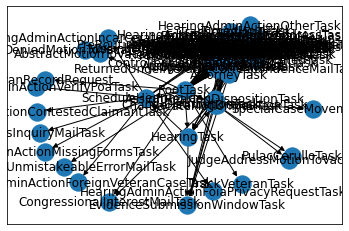

In [163]:
G = nx.from_pandas_edgelist(cpCounts, source='parent_type',target='child_type', edge_attr=['count'],create_using=nx.DiGraph())
pos=nx.spring_layout(G) # positions for all nodes
nx.draw_networkx(G, pos)

In [ ]:
!conda install --yes --prefix {sys.prefix} pygraphviz

In [164]:
# https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout
# https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_agraph.graphviz_layout.html
pos = nx.nx_agraph.graphviz_layout(G, prog='neato')

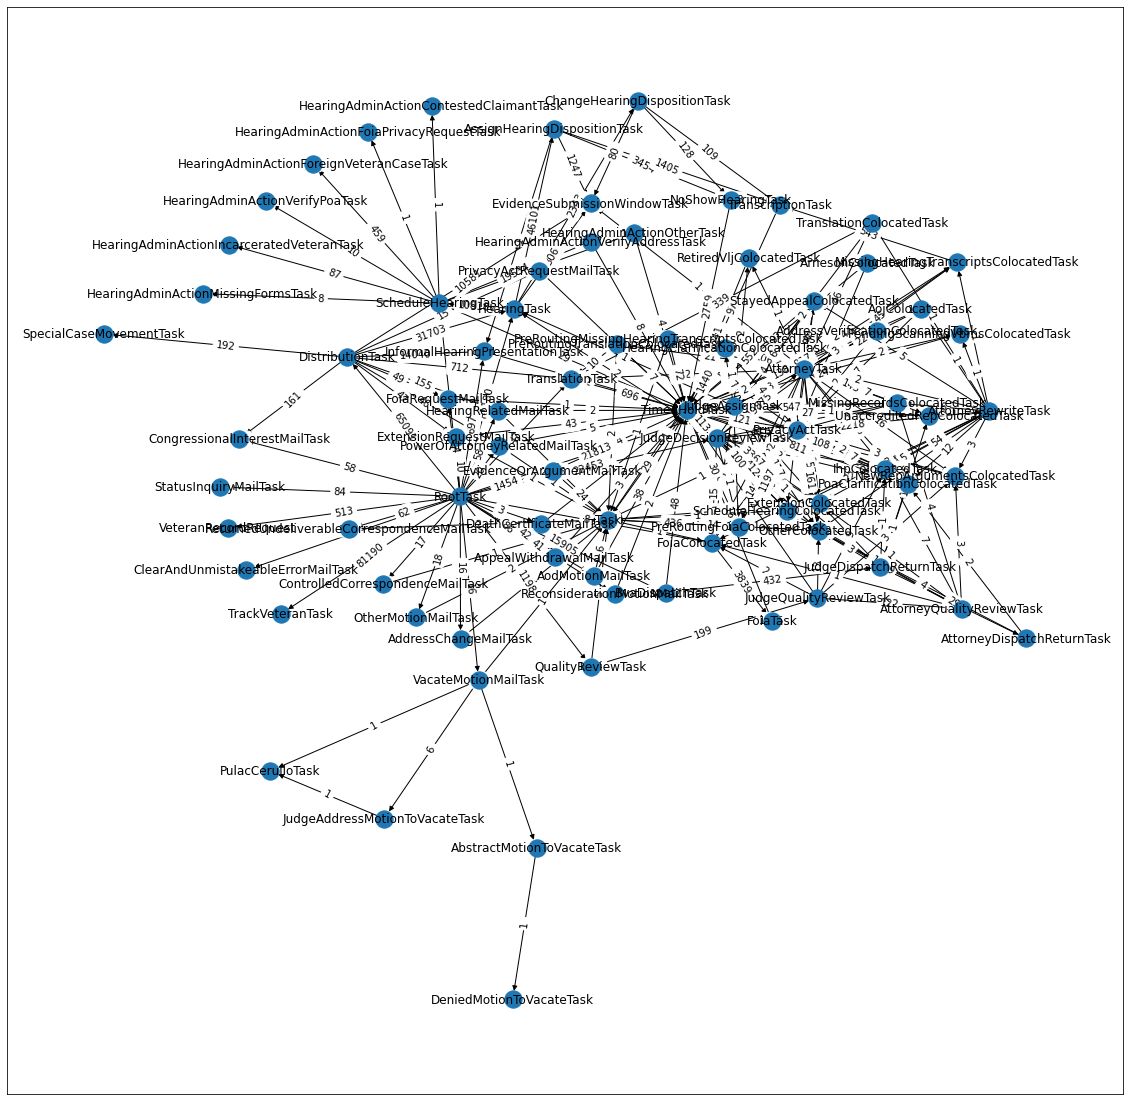

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

edge_labels=dict([((u,v,), d['count']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx(G, pos)

In [ ]:
# Interactive network options
# 1. http://compbio.ucsd.edu/bringing-interactivity-network-visualization-jupyter-notebooks-visjs2jupyter/
!conda install --yes --prefix {sys.prefix} pyvis

In [188]:
from pyvis.network import Network
nt = Network(height="800px", width="100%", notebook=True)
# populates the nodes and edges data structures
nt.from_nx(G)
nt.show_buttons(filter_=['nodes', 'edges', 'physics'])
nt.show("readyForTweaking.html")

In [216]:
nt2 = Network(height="800px", width="100%", notebook=True)
# populates the nodes and edges data structures
nt2.from_nx(G)
my_options="""
var options = {
  "nodes": {
    "size": 10
  },
  "edges": {
    "arrows": {
      "to": {
        "enabled": true,
        "scaleFactor": 1
      }
    },
    "color": {
      "inherit": true
    },
    "scaling": {
      "label": {
        "max": 77,
        "drawThreshold": 10
      }
    },
    "smooth": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -10200,
      "centralGravity": 0.05,
      "springLength": 135,
      "springConstant": 0.035,
      "damping": 0.39,
      "avoidOverlap": 0.65
    },
    "maxVelocity": 42,
    "minVelocity": 0.75,
    "timestep": 0.34
  }
}
"""
nt2.set_options(my_options)
nt2.show("example.html")

In [219]:
nt3 = Network(height="750px", width="100%", notebook=True)
nt3.set_options(my_options)
# nt3.show_buttons(filter_=['edges'])
for index, r in cpCounts.iterrows():
    src=r['child_type']
    dst=r['parent_type']
    nt3.add_node(src, src, title=src)
    nt3.add_node(dst, dst, title=dst)
    nt3.add_edge(src, dst, title=r['count'], value=r['count']) # value sets the edge width
# for node in nt3.nodes:
#     print(node)
nt3.show("ParentChildTaskTypeCounts.html")